# Uncertainties and Randomization Demo

In [71]:
from surveySimPP.modules.PPAddUncertainties import addUncertainties
from surveySimPP.modules.PPRandomizeMeasurements import randomizeAstrometry

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This notebook demonstrates the uncertainties calculation and the randomisation of object position and magnitude based on the calculated uncertainties.

First we load the data.

In [44]:
observations = pd.read_csv('uncertaintiesDemo.csv')

In [84]:
observations.columns

Index(['ObjID', 'FieldID', 'FieldMJD', 'AstRange(km)', 'AstRangeRate(km/s)',
       'AstRA(deg)', 'AstRARate(deg/day)', 'AstDec(deg)',
       'AstDecRate(deg/day)', 'Ast-Sun(J2000x)(km)', 'Ast-Sun(J2000y)(km)',
       'Ast-Sun(J2000z)(km)', 'Ast-Sun(J2000vx)(km/s)',
       'Ast-Sun(J2000vy)(km/s)', 'Ast-Sun(J2000vz)(km/s)',
       'Obs-Sun(J2000x)(km)', 'Obs-Sun(J2000y)(km)', 'Obs-Sun(J2000z)(km)',
       'Obs-Sun(J2000vx)(km/s)', 'Obs-Sun(J2000vy)(km/s)',
       'Obs-Sun(J2000vz)(km/s)', 'Sun-Ast-Obs(deg)', 'H_r', 'u-r', 'y-r', 'GS',
       't_0', 't_p', 'argperi', 'node', 'incl', 'e', 'q', 'optFilter',
       'seeingFwhmGeom', 'seeingFwhmEff', 'fiveSigmaDepth', 'fieldRA',
       'fieldDec', 'rotSkyPos', 'TrailedSourceMag', 'PSFMag',
       'fiveSigmaDepthAtSource', 'AstrometricSigma(deg)',
       'PhotometricSigmaTrailedSource(mag)', 'SNR', 'PhotometricSigmaPSF(mag)',
       'observedTrailedSourceMag', 'observedPSFMag', 'AstRATrue(deg)',
       'AstDecTrue(deg)'],
      dtype='object

As can be seen from the columns, both TrailedSourceMag (the magnitude of the source including any trailing) and PSFMag (the magnitude of the object within the aperture) are included here. The code will calculate the uncertainties for each one.

In [46]:
configs = {'trailing_losses_on':True}
rng = np.random.default_rng(2012)

In [47]:
obs_uncert = addUncertainties(observations, configs, rng)

In [48]:
obs_uncert.columns

Index(['ObjID', 'FieldID', 'FieldMJD', 'AstRange(km)', 'AstRangeRate(km/s)',
       'AstRA(deg)', 'AstRARate(deg/day)', 'AstDec(deg)',
       'AstDecRate(deg/day)', 'Ast-Sun(J2000x)(km)', 'Ast-Sun(J2000y)(km)',
       'Ast-Sun(J2000z)(km)', 'Ast-Sun(J2000vx)(km/s)',
       'Ast-Sun(J2000vy)(km/s)', 'Ast-Sun(J2000vz)(km/s)',
       'Obs-Sun(J2000x)(km)', 'Obs-Sun(J2000y)(km)', 'Obs-Sun(J2000z)(km)',
       'Obs-Sun(J2000vx)(km/s)', 'Obs-Sun(J2000vy)(km/s)',
       'Obs-Sun(J2000vz)(km/s)', 'Sun-Ast-Obs(deg)', 'H_r', 'u-r', 'y-r', 'GS',
       't_0', 't_p', 'argperi', 'node', 'incl', 'e', 'q', 'optFilter',
       'seeingFwhmGeom', 'seeingFwhmEff', 'fiveSigmaDepth', 'fieldRA',
       'fieldDec', 'rotSkyPos', 'TrailedSourceMag', 'PSFMag',
       'fiveSigmaDepthAtSource', 'AstrometricSigma(deg)',
       'PhotometricSigmaTrailedSource(mag)', 'SNR', 'PhotometricSigmaPSF(mag)',
       'observedTrailedSourceMag', 'observedPSFMag'],
      dtype='object')

As can be seen from the above, we have several new columns:

**observedTrailedSourceMag/observedPSFMag:** a randomised magnitude as 'observed' by the telescope, based on the 'true' magnitude and its calculated uncertainty

**PhotometricSigmaTrailedSource(mag)/PhotometricSigmaPSF(mag):** the uncertainty on the magnitude measurement

**AstrometricSigma(deg):** the uncertainty on the object position.

Let's take a look at these.

Text(0.5, 0, 'photometric uncertainty (mag)')

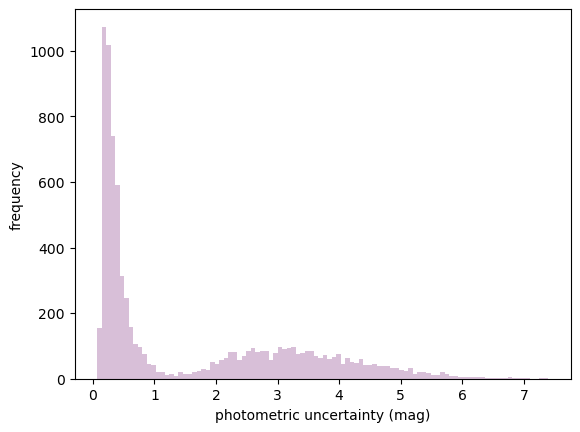

In [65]:
trailed_sig = obs_uncert['PhotometricSigmaTrailedSource(mag)'].values

fig, ax = plt.subplots(1)
ax.hist(trailed_sig, 100, color='thistle')
ax.set_ylabel('frequency')
ax.set_xlabel('photometric uncertainty (mag)')

We can also check the difference between the uncertainties for the trailed source and PSF magnitudes.

Text(0.5, 0, 'trailed source - PSF magnitude uncertainty (mag)')

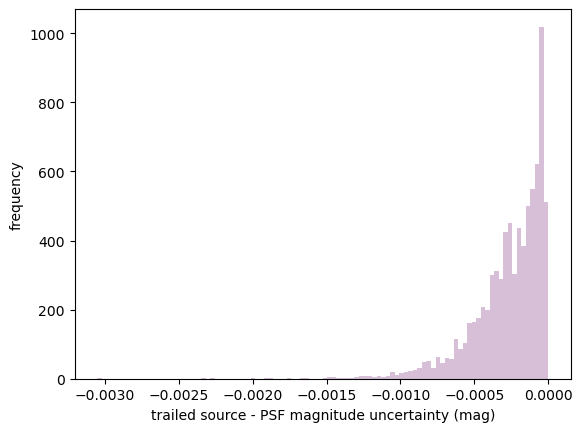

In [63]:
diff_sig = obs_uncert['PhotometricSigmaTrailedSource(mag)'].values - obs_uncert['PhotometricSigmaPSF(mag)'].values

fig, ax = plt.subplots(1)
ax.hist(diff_sig, 100, color='thistle')
ax.set_ylabel('frequency')
ax.set_xlabel('trailed source - PSF magnitude uncertainty (mag)')

And we can see how much the observed magnitudes differ from the true magnitudes.

In [75]:
diff_PSF = obs_uncert['PSFMag'].values - obs_uncert['observedPSFMag'].values
diff_trailed = obs_uncert['TrailedSourceMag'].values - obs_uncert['observedTrailedSourceMag'].values

Text(0.5, 0, 'true - observed PSF magnitude (mag)')

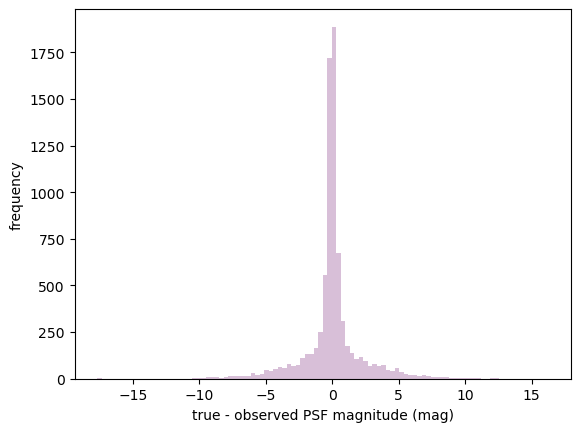

In [77]:
fig, ax = plt.subplots(1)
ax.hist(diff_PSF, 100, color='thistle')
ax.set_ylabel('frequency')
ax.set_xlabel('true - observed PSF magnitude (mag)')

Text(0.5, 0, 'true - observed trailed source magnitude (mag)')

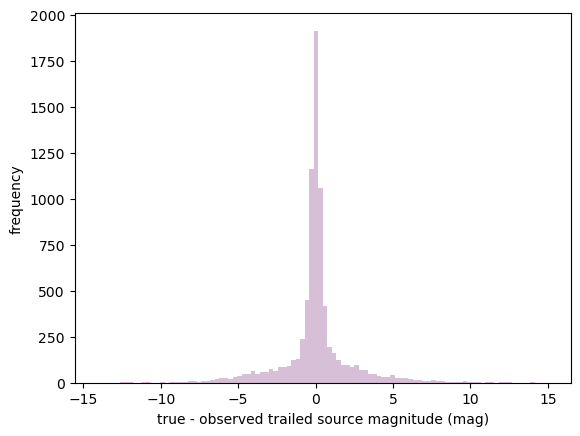

In [78]:
fig, ax = plt.subplots(1)
ax.hist(diff_trailed, 100, color='thistle')
ax.set_ylabel('frequency')
ax.set_xlabel('true - observed trailed source magnitude (mag)')

Also, the astrometric uncertainty:

Text(0.5, 0, 'astrometric uncertainty (deg)')

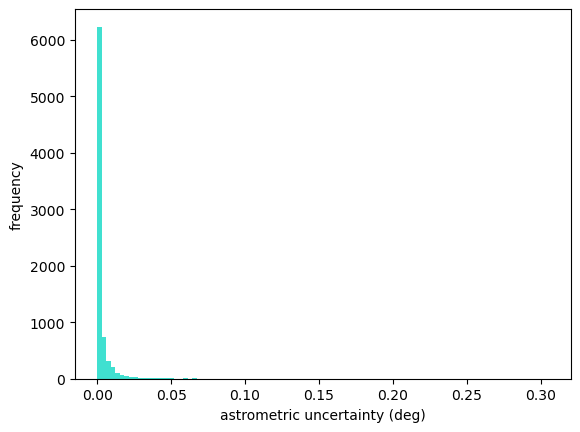

In [70]:
astrometric_sig = obs_uncert['AstrometricSigma(deg)'].values

fig, ax = plt.subplots(1)
ax.hist(astrometric_sig, 100, color='turquoise')
ax.set_ylabel('frequency')
ax.set_xlabel('astrometric uncertainty (deg)')

A separate function then randomises the object position based on its astrometric uncertainty.

In [74]:
obs_uncert['AstRATrue(deg)'] = obs_uncert['AstRA(deg)']
obs_uncert['AstDecTrue(deg)'] = obs_uncert['AstDec(deg)']
obs_uncert['AstRA(deg)'], obs_uncert['AstDec(deg)'] = randomizeAstrometry(obs_uncert, rng, sigName='AstrometricSigma(deg)', sigUnits='deg')

In [79]:
RA_diff = obs_uncert['AstRATrue(deg)'].values - obs_uncert['AstRA(deg)'].values
dec_diff = obs_uncert['AstDecTrue(deg)'].values - obs_uncert['AstDec(deg)'].values

Text(0.5, 0, 'true - observed RA (deg)')

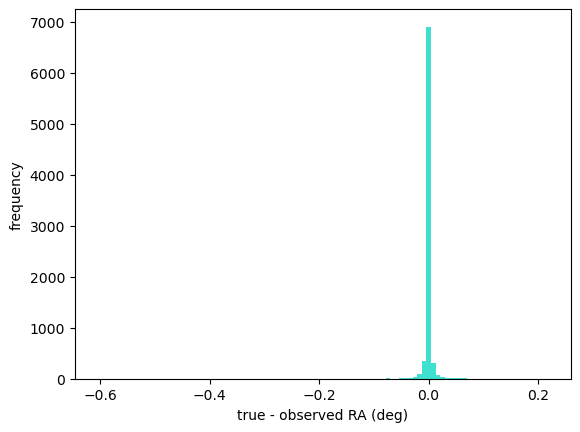

In [82]:
fig, ax = plt.subplots(1)
ax.hist(RA_diff, 100, color='turquoise')
ax.set_ylabel('frequency')
ax.set_xlabel('true - observed RA (deg)')

Text(0.5, 0, 'true - observed Dec (deg)')

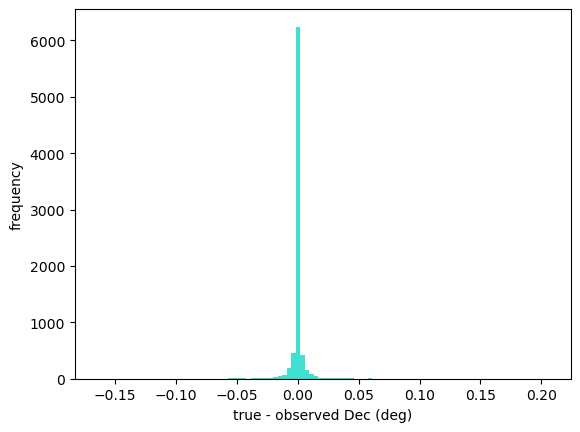

In [83]:
fig, ax = plt.subplots(1)
ax.hist(dec_diff, 100, color='turquoise')
ax.set_ylabel('frequency')
ax.set_xlabel('true - observed Dec (deg)')